In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('../data/diamonds.csv')

# Univariate Exploration

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

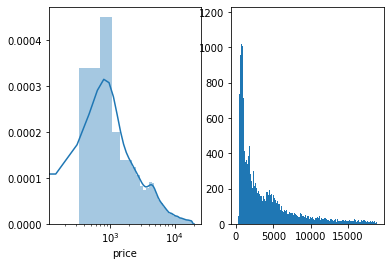

In [5]:
# univariate plot of diamond prices
plt.subplot(1,2,1)
sb.distplot(diamonds.price).set_xscale('log');
plt.subplot(1,2,2)
plt.hist(diamonds.price, 500);
# plt.xscale('log');

The distribution is slightly bimodal and strongly right skewed.

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the 'color=white' style on the text to un-spoiler the commentary.

Price distribution comment 1: <span style="color:white">You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

Price distribution comment 2: <span style="color:white">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

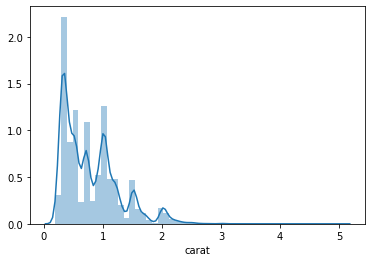

In [6]:
# univariate plot of carat weights
sb.distplot(diamonds.carat);

(0, 3)

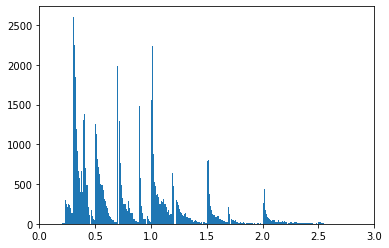

In [7]:
plt.hist(diamonds.carat, 500);
plt.xlim(0,3)

Carat distribution comment: <span style="color:white">You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [8]:
base_color = sb.color_palette()[0]

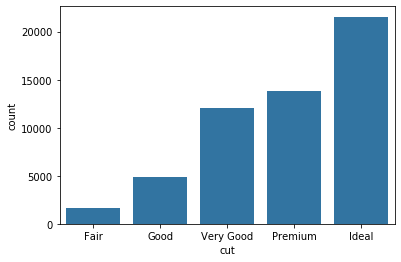

In [9]:
# bad cut << --- >> good cut
diamond_cut = ['Fair','Good','Very Good','Premium','Ideal']
sb.countplot(data=diamonds, x='cut', order = diamond_cut, color=base_color);

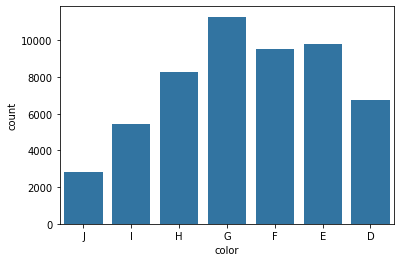

In [10]:
# color << --- >> colorless
diamond_color = ['J', 'I', 'H', 'G','F','E','D']
sb.countplot(data=diamonds, x='color', order=diamond_color, color=base_color);

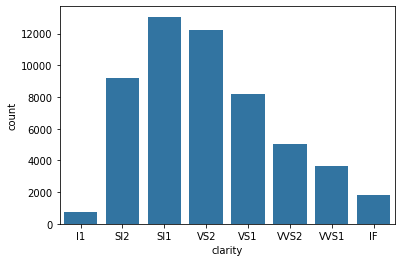

In [11]:
# inclusions << --- >> clear
diamond_clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sb.countplot(data=diamonds, x='clarity', order=diamond_clarity, color=base_color);

General categorical feature comment: <span style="color:white">Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span style="color:white">The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span style="color:white">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span style="color:white">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

# Bivariate exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

In [12]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

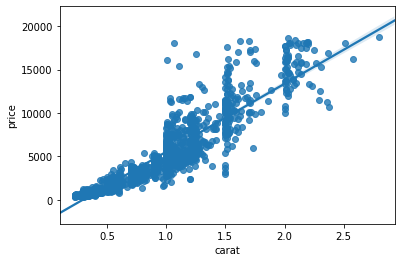

In [13]:
# bivariate plot of price vs. carat
sample = np.random.choice(diamonds.shape[0],2000, replace = False)
sample = diamonds.loc[sample]
sb.regplot(data=sample, x='carat', y='price');

Price vs. Carat comment 1: <span style="color:white">Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.</span>

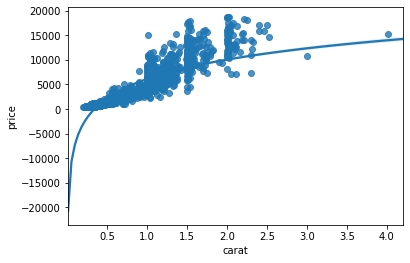

In [14]:
# bivariate plot of price vs. carat
sample = np.random.choice(diamonds.shape[0],2000, replace = False);
sample = diamonds.loc[sample]
sb.regplot(data=sample, x='carat', y='price', logx=True);

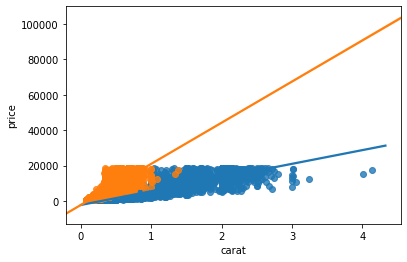

In [15]:
# bivariate plot of price vs. carat
sample = np.random.choice(diamonds.shape[0],20000, replace = False);
sample = diamonds.loc[sample]
sb.regplot(data=sample, x='carat', y='price');
sample.carat = sample.carat ** 1/3
sb.regplot(data=sample, x='carat', y='price', color = sb.color_palette()[1]);

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

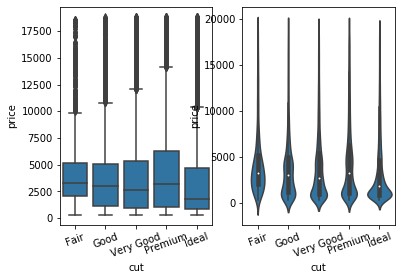

In [16]:
# bivariate plots of price vs. cut, color, clarity
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='cut', y='price', color=base_color);
plt.xticks(rotation=20)
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='cut', y='price', color=base_color);
plt.xticks(rotation=20)

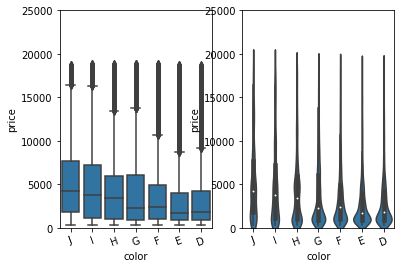

In [17]:
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='color', y='price', color=base_color);
plt.xticks(rotation=20)
plt.ylim(0, 25000);
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='color', y='price', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 25000);

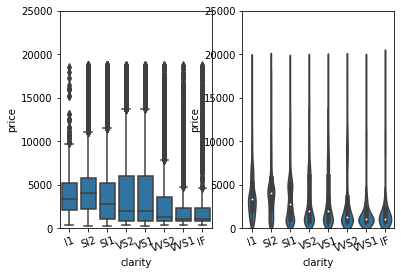

In [18]:
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='clarity', y='price', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 25000);
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='clarity', y='price', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 25000);

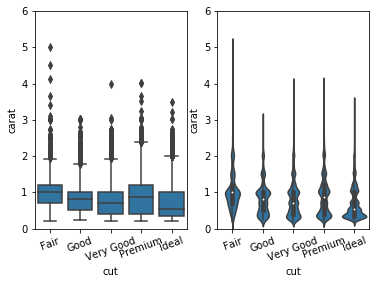

In [19]:
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='cut', y='carat', color=base_color);
plt.xticks(rotation=20)
plt.ylim(0, 6);
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='cut', y='carat', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 6);

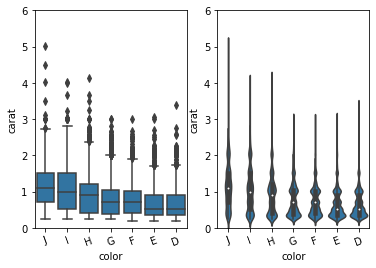

In [20]:
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='color', y='carat', color=base_color);
plt.xticks(rotation=20)
plt.ylim(0, 6);
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='color', y='carat', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 6);

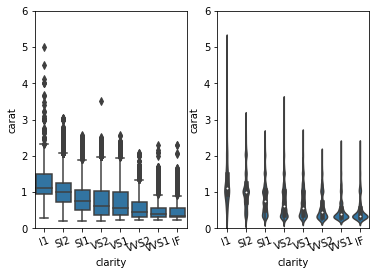

In [21]:
plt.subplot(1,2,1)
sb.boxplot(data=diamonds, x='clarity', y='carat', color=base_color);
plt.xticks(rotation=20)
plt.ylim(0, 6);
plt.subplot(1,2,2)
sb.violinplot(data=diamonds, x='clarity', y='carat', color=base_color);
plt.xticks(rotation=20);
plt.ylim(0, 6);

# Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

In [22]:
diamonds.clarity

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

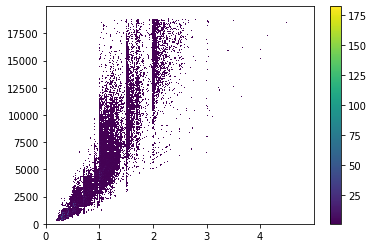

In [23]:
# multivariate plot of price by carat weight, and clarity
bins_carat = np.arange(0,5,0.001)
bins_price = np.arange(0,20000, 10)

plt.hist2d(data=diamonds, x='carat', y='price', cmin=0.01,
          bins=[bins_carat, bins_price]);

plt.colorbar();

In [24]:
diamonds['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [25]:
diamonds.clarity

0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

In [26]:
clarity_values = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [114]:
diamonds['clarity_values'] = diamonds.clarity.apply(lambda x: clarity_values[x]).astype(int)

In [29]:
# specify bins for x and y axes
bins_x = np.arange(0,6,0.05)
bins_y = np.arange(0,20000, 50)

bins_carat = pd.cut(diamonds['carat'], bins_x, right=False, include_lowest=False,
                   labels=False).astype(int)
bins_price = pd.cut(diamonds['price'], bins_y, right=False, include_lowest=False,
                   labels=False).astype(int)

n_points = diamonds.groupby([bins_carat, bins_price]).size()

# n_points = n_points.reset_index().pivot(index='carat', columns='price').values

# clarity_weights = diamonds['clarity_values'] / n_points[bins_carat, bins_price]

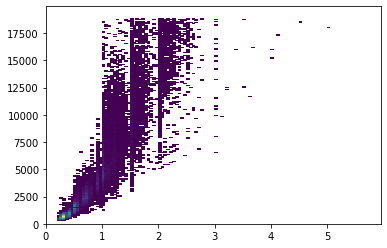

In [30]:
plt.hist2d(data=diamonds, x='carat', y='price', cmin=0.1,
          cmap='viridis', bins=[bins_x, bins_y]);

In [95]:
xbin_edges = np.arange(0, diamonds['carat'].max() + 0.5, 0.05) # ndarray, 111 long
ybin_edges = np.arange(0, diamonds['price'].max() + 50, 50) # ndarray, 378 long

xbin_idxs = pd.cut(diamonds['carat'], xbin_edges, right=False, include_lowest=True,
                   labels=False).astype(int) # Series, 53940 long
ybin_idxs = pd.cut(diamonds['price'], ybin_edges, right=False, include_lowest=True,
                   labels=False).astype(int) # Series, 53940 long

pts_per_bin = diamonds.groupby([xbin_idxs, ybin_idxs]).size() # Series, 4631 long
pts_per_bin = pts_per_bin.reset_index() # Dataframe, 4631x3
pts_per_bin = pts_per_bin.pivot(index='carat', columns='price') # Dataframe, 63x371
pts_per_bin = pts_per_bin.values # ndarray, 63x371

# 
# this line is not working 
# IndexError: index 72 is out of bounds for axis 0 with size 63

bin_weights = pts_per_bin[bins_carat, bins_price]

# placeholder until the line above is sorted
# bin_weights = 0.1 

# clarity_weights = diamonds['clarity_values']

IndexError: index 72 is out of bounds for axis 0 with size 63

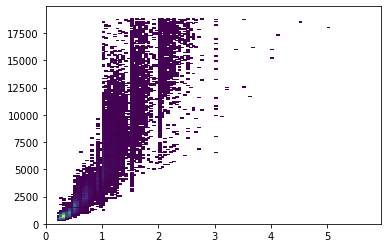

In [92]:
plt.hist2d(data=diamonds, x='carat', y='price', cmin=0.1,
          cmap='viridis', bins=[bins_x, bins_y], 
          weights = clarity_weights);

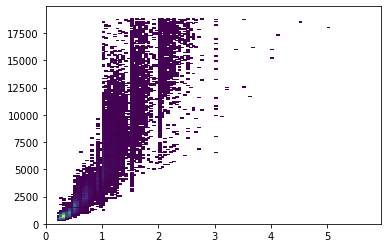

In [125]:
xbin_edges = np.arange(0,diamonds['carat'].max() + 0.5, 0.01)
ybin_edges = np.arange(0,diamonds['price'].max()+50, 50)

xbin_idxs = pd.cut(diamonds['carat'], xbin_edges)
ybin_idxs = pd.cut(diamonds['price'], ybin_edges)

tmp=pd.pivot_table(diamonds, aggfunc='mean', values='clarity_values',
                   columns=xbin_idxs,
                   index=ybin_idxs,
                  )
# sb.heatmap(tmp, cmap='viridis');

plt.hist2d(data=diamonds, x='carat', y='price', cmin=0.1,
          cmap='viridis', bins=[bins_x, bins_y], 
          weights = clarity_weights);

Price by Carat and Clarity Comment 1: <span style="color:white">With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

Price by Carat and Clarity Comment 2: <span style="color:white">You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [ ]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds



Price by Cut and Color Comment 1: <span style="color:white">There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

Price by Cut and Color Comment 2: <span style="color:white">Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>